# Parkinson’s Disease Classification :
Parkinson's is a disease that can cause a nervous system disorder and affects the movement. Parkinson dataset contains biomedical measurements, 195 records of people with 23 different attributes. This
data is used to differentiate healthy people and people with Parkinson’s disease.
Task: Build a model that can be used to differentiate healthy people from people
having Parkinson’s disease.
Data Set Link: -
https://drive.google.com/file/d/19lHdLQpB4JDarhQO1WuYPz2XRyU5L3rS/view?usp=sharing

# Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing

# Reading the DataFrame
### Exploring Data

In [2]:
parkin_df = pd.read_csv("pd_speech_features.csv")
parkin_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
parkin_df.tail()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [4]:
parkin_df.shape

(756, 755)

In [5]:
parkin_df.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

In [6]:
parkin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
parkin_df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
parkin_df.isnull()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
parkin_df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

### Graph for samples

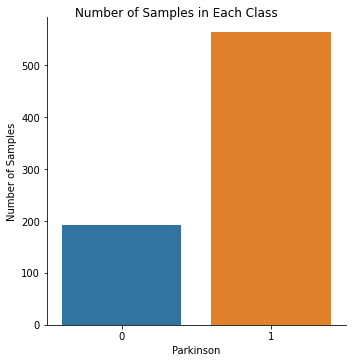

In [10]:
a = sns.catplot(x='class', data=parkin_df, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1)
a.set(ylabel='Number of Samples', xlabel='Parkinson')
plt.show()

<AxesSubplot:>

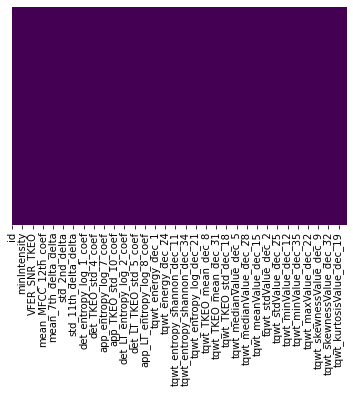

In [11]:
sns.heatmap(parkin_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Upsampling Data

In [12]:
y = parkin_df.loc[:,'class']
X = parkin_df.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X = pd.concat([X_train, y_train], axis=1)
parkinson = X.loc[X['class'] == 1]
not_parkinson = X.loc[X['class'] == 0]
fraud_upsampled = resample(not_parkinson,
                          replace=True,
                          n_samples=len(parkinson),
                          random_state=27)

upsampled = pd.concat([parkinson, fraud_upsampled])
y_train_up = upsampled.loc[:,'class']
X_train_up = upsampled.drop(['class'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_up = min_max_scaler.fit_transform(X_train_up)
X_test = min_max_scaler.transform(X_test)
upsampled['class'].value_counts()

1    421
0    421
Name: class, dtype: int64

# Spliting the data

In [13]:
y = parkin_df.loc[:,'class']
X = parkin_df.drop(['class', 'id'], axis=1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=27)


min_max_scaler = preprocessing.MinMaxScaler()
              
Xtrain = min_max_scaler.fit_transform(Xtrain)
Xtest = min_max_scaler.transform(Xtest)

# Training model

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(Xtrain,Ytrain)

LogisticRegression(solver='liblinear')

In [15]:
pred1=logmodel.predict(Xtest)
acc1=metrics.accuracy_score(Ytest,pred1)
print(acc1)

0.8201058201058201


<AxesSubplot:>

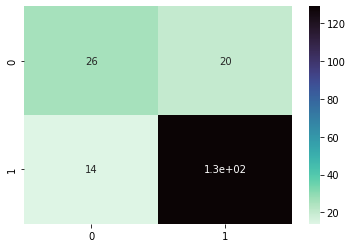

In [16]:
cm1 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred1))
sns.heatmap(cm1, annot=True,cmap="mako_r")

In [17]:
cr1=metrics.classification_report(Ytest,pred1)
print(cr1)

              precision    recall  f1-score   support

           0       0.65      0.57      0.60        46
           1       0.87      0.90      0.88       143

    accuracy                           0.82       189
   macro avg       0.76      0.73      0.74       189
weighted avg       0.81      0.82      0.82       189



## Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier(criterion = 'entropy')
dtmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [19]:
pred2=dtmodel.predict(Xtest)

In [20]:
acc2=metrics.accuracy_score(Ytest,pred2)
print(acc2)

0.8095238095238095


<AxesSubplot:>

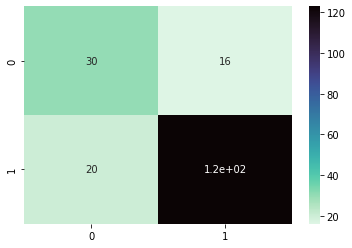

In [21]:
cm2 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred2))
sns.heatmap(cm2, annot=True,cmap="mako_r")

In [22]:
cr2=metrics.classification_report(Ytest,pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.60      0.65      0.63        46
           1       0.88      0.86      0.87       143

    accuracy                           0.81       189
   macro avg       0.74      0.76      0.75       189
weighted avg       0.82      0.81      0.81       189



In [23]:
dtmodel2=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
dtmodel2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [24]:
pred3=dtmodel2.predict(Xtest)

In [25]:
acc3=metrics.accuracy_score(Ytest,pred3)
print(acc3)

0.8095238095238095


<AxesSubplot:>

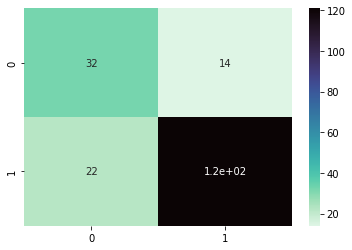

In [26]:
cm3 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred3))
sns.heatmap(cm3, annot=True,cmap="mako_r")

In [27]:
cr3=metrics.classification_report(Ytest,pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        46
           1       0.90      0.85      0.87       143

    accuracy                           0.81       189
   macro avg       0.74      0.77      0.76       189
weighted avg       0.82      0.81      0.81       189



## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 10, weights = 'distance' )

NNH.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [29]:
pred4 = NNH.predict(Xtest)

In [30]:
acc4=metrics.accuracy_score(Ytest,pred4)
print(acc4)

0.8624338624338624


<AxesSubplot:>

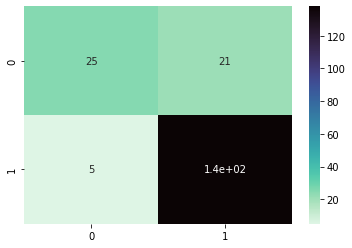

In [31]:
cm4 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred4))
sns.heatmap(cm4, annot=True,cmap="mako_r")

In [32]:
cr4=metrics.classification_report(Ytest,pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.83      0.54      0.66        46
           1       0.87      0.97      0.91       143

    accuracy                           0.86       189
   macro avg       0.85      0.75      0.79       189
weighted avg       0.86      0.86      0.85       189



## Navie Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(Xtrain, Ytrain)

GaussianNB()

In [34]:
pred5 = NBmodel.predict(Xtest)

In [35]:
acc5=metrics.accuracy_score(Ytest,pred5)
print(acc5)

0.8042328042328042


<AxesSubplot:>

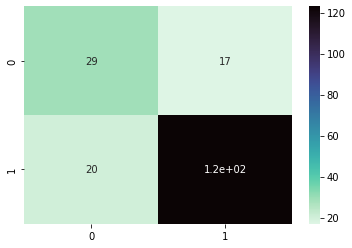

In [36]:
cm5 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred5))
sns.heatmap(cm5, annot=True,cmap="mako_r")

In [37]:
cr5=metrics.classification_report(Ytest,pred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        46
           1       0.88      0.86      0.87       143

    accuracy                           0.80       189
   macro avg       0.74      0.75      0.74       189
weighted avg       0.81      0.80      0.81       189



## SVM

In [38]:
from sklearn import svm
svmmodel = svm.SVC(gamma=0.025, C=10)    

svmmodel.fit(Xtrain , Ytrain)

SVC(C=10, gamma=0.025)

In [39]:
pred6 = svmmodel.predict(Xtest)

In [40]:
acc6=metrics.accuracy_score(Ytest,pred6)
print(acc6)

0.8518518518518519


<AxesSubplot:>

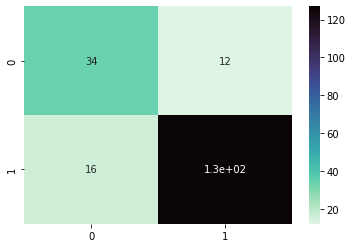

In [41]:
cm6 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred6))
sns.heatmap(cm6, annot=True,cmap="mako_r")

In [42]:
cr6=metrics.classification_report(Ytest,pred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        46
           1       0.91      0.89      0.90       143

    accuracy                           0.85       189
   macro avg       0.80      0.81      0.80       189
weighted avg       0.86      0.85      0.85       189



In [43]:
y_pred = svmmodel.predict(Xtest)
pd.crosstab(Ytest, y_pred)

col_0,0,1
class,,
0,34,12
1,16,127


## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 50, criterion="entropy")  
classifier.fit(Xtrain, Ytrain)  

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [45]:
pred7 = classifier.predict(Xtest)

In [46]:
acc7=metrics.accuracy_score(Ytest,pred7)
print(acc7)

0.873015873015873


In [47]:
cm7=metrics.confusion_matrix(Ytest,pred7)
print(cm7)

[[ 29  17]
 [  7 136]]


<AxesSubplot:>

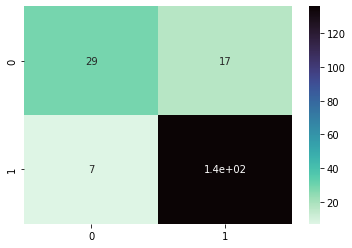

In [48]:
cm7 = pd.DataFrame(metrics.confusion_matrix(Ytest, pred7))
sns.heatmap(cm7, annot=True,cmap="mako_r")

## Plotting Accuracy

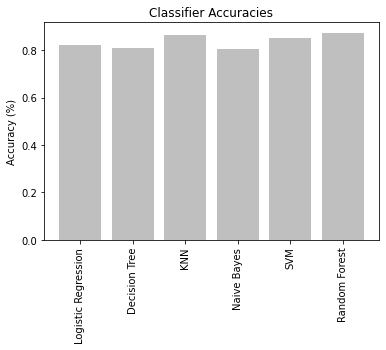

In [49]:
predictors_group = ('Logistic Regression', 'Decision Tree','KNN', 'Naive Bayes', 'SVM', 'Random Forest')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc1, acc3, acc4, acc5, acc6, acc7]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='grey')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()